In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# -----------------------------------------
# Step 1: Create Sample Data with Missing Values
# -----------------------------------------
data = {
    'Age': [25, np.nan, 35, 45, 30],
    'Salary': [50000, 60000, np.nan, 80000, 70000],
    'Experience': [1, 2, 3, np.nan, 5]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# -----------------------------------------
# Step 2: Handle Missing Values (Mean Imputation)
# -----------------------------------------
df_filled = df.fillna(df.mean(numeric_only=True))  # Fill NaNs with column mean
print("\nAfter Handling Missing Values (Mean Imputation):\n", df_filled)

# -----------------------------------------
# Step 3: Normalize the Data (Min-Max Scaling)
# -----------------------------------------
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

print("\nAfter Normalization (Min-Max Scaling):\n", df_normalized)


Original Data:
     Age   Salary  Experience
0  25.0  50000.0         1.0
1   NaN  60000.0         2.0
2  35.0      NaN         3.0
3  45.0  80000.0         NaN
4  30.0  70000.0         5.0

After Handling Missing Values (Mean Imputation):
      Age   Salary  Experience
0  25.00  50000.0        1.00
1  33.75  60000.0        2.00
2  35.00  65000.0        3.00
3  45.00  80000.0        2.75
4  30.00  70000.0        5.00

After Normalization (Min-Max Scaling):
       Age    Salary  Experience
0  0.0000  0.000000      0.0000
1  0.4375  0.333333      0.2500
2  0.5000  0.500000      0.5000
3  1.0000  1.000000      0.4375
4  0.2500  0.666667      1.0000


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



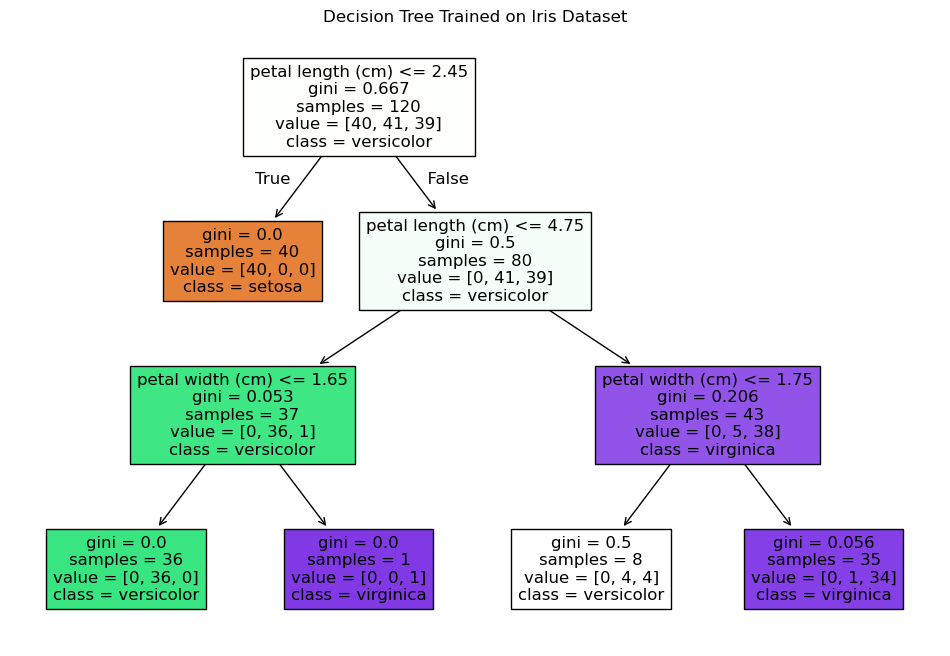

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data           # Features
y = iris.target         # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Predict labels on test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()


Original shape: (150, 4)
Transformed shape: (150, 2)

Explained Variance Ratio: [0.72962445 0.22850762]


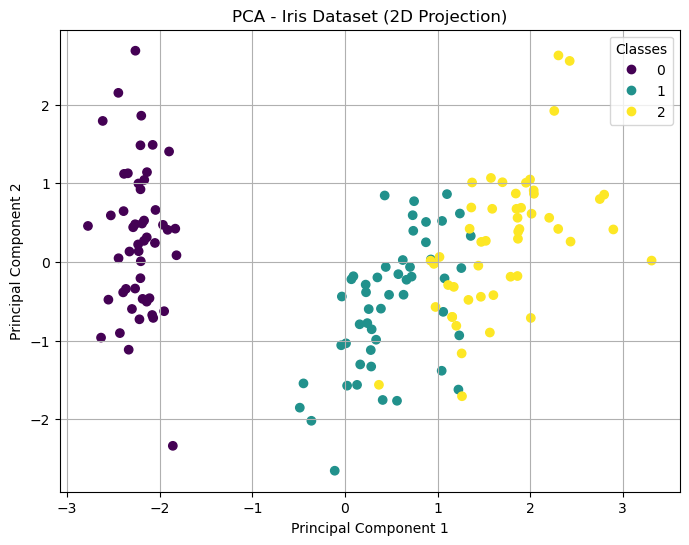

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Step 2: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to Reduce to 2 Dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Display Results
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Step 5: Visualize the Result
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Iris Dataset (2D Projection)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()
